In [2]:
!pip install h3pandas
!pip install folium
!pip install branca
!pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 13.5 MB/s eta 0:00:00


In [3]:

import h3pandas
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm
from shapely.geometry import box

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/311_Service_Requests_2007.csv")

In [5]:
data.head()

,Case Summary,Case Status,Case Source,Case Created Date,Case Created dttm,Case Closed Date,Case Closed dttm,First Call Resolution,Customer Zip Code,Incident Address 1,...,Latitude,Agency,Division,Major Area,Type,Topic,Council District,Police District,Neighborhood,ObjectId
0,Missed Trash Collection,Closed,Email,1/1/2007 12:00:00 AM,1/1/2007 11:42:01 AM,1/2/2007 12:00:00 AM,1/2/2007 8:34:20 AM,N,,3380 S Locust St,...,39.655934,Public Works,Solid Waste,Trash Collection,Information,Miss Trsh/Recy/Cmpst,4,3,Hampden,1
1,Snow Plowing or Ice Blading (warm transfer to ...,Closed,Web,1/1/2007 12:00:00 AM,1/1/2007 2:41:59 AM,1/2/2007 12:00:00 AM,1/2/2007 12:19:02 PM,N,,3832 W 1st Ave,...,39.717865,Public Works,Street Maint,Street/Alley,Service,Snow Control,3,4,Barnum,2
2,Loose Dog,Closed,Web,1/1/2007 12:00:00 AM,1/1/2007 1:44:08 PM,1/2/2007 12:00:00 AM,1/2/2007 8:00:17 AM,N,0,2228 S Fox St,...,39.676172,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,7,3,Overland,3
3,Recycling Information,Closed,Web,1/1/2007 12:00:00 AM,1/1/2007 6:17:42 AM,1/2/2007 12:00:00 AM,1/2/2007 8:05:58 AM,N,80246-1159,NaN,...,0.000000,Public Works,Solid Waste,Recycle-Collection,Information,Recycling Info,0,0,NaN,4
4,311 - General Inquiry,Closed,Email,1/1/2007 12:00:00 AM,1/1/2007 4:51:16 PM,1/2/2007 12:00:00 AM,1/2/2007 7:55:22 AM,N,,NaN,...,0.000000,Tech Services,311 Call Center,General Inquiry,Information,General Inquiry,0,0,NaN,5


In [6]:
data.shape

(379840, 25)

In [7]:
data["Case Summary"].value_counts().head(20)

,count
Case Summary,
311 - General Inquiry,30650
Out of Jurisdiction,19130
311 - Employee Transfer,14727
Police Department General Inquiry,9766
411 Information,8683
Large Item Pickup,8641
Pothole needs repair (queue case),8311
Excise and License License/permit requirements and types,8104
"Finding a lost pet, returning a found pet, or requesting a tag trace",7813


In [8]:
mask = data["Case Summary"] == "Loose Dog / Leash Law Violation"
prepared_data = data[mask]
prepared_data = prepared_data.dropna(subset=["Latitude", "Longitude"])
prepared_data.head()

,Case Summary,Case Status,Case Source,Case Created Date,Case Created dttm,Case Closed Date,Case Closed dttm,First Call Resolution,Customer Zip Code,Incident Address 1,...,Latitude,Agency,Division,Major Area,Type,Topic,Council District,Police District,Neighborhood,ObjectId
7605,Loose Dog / Leash Law Violation,Closed,Phone,1/8/2007 12:00:00 AM,1/8/2007 4:27:22 PM,1/8/2007 12:00:00 AM,1/8/2007 4:38:14 PM,N,,3300 S Tamarac Dr,...,39.656445,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,4,3,Hampden,7606
7621,Loose Dog / Leash Law Violation,Closed,Phone,1/8/2007 12:00:00 AM,1/8/2007 5:48:04 PM,1/8/2007 12:00:00 AM,1/8/2007 6:14:18 PM,N,,,...,39.760320,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,1,1,West Highland,7622
7624,Loose Dog / Leash Law Violation,Closed,Phone,1/8/2007 12:00:00 AM,1/8/2007 5:15:29 PM,1/8/2007 12:00:00 AM,1/8/2007 6:02:55 PM,N,80219-5918,2210 S Decatur St,...,39.676162,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,7,4,College View / South Platte,7625
7656,Loose Dog / Leash Law Violation,Closed,Phone,1/8/2007 12:00:00 AM,1/8/2007 3:35:56 PM,1/8/2007 12:00:00 AM,1/8/2007 3:40:36 PM,N,,,...,39.731215,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,3,1,Villa Park,7657
7659,Loose Dog / Leash Law Violation,Closed,Phone,1/8/2007 12:00:00 AM,1/8/2007 6:22:30 PM,1/8/2007 12:00:00 AM,1/8/2007 6:42:19 PM,N,,NaN,...,0.000000,Env Health,Animl Care&Cntl,Animal Control,Complaint,Loose Dog,0,0,NaN,7660


In [9]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6945 entries, 7605 to 379563
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Case Summary             6945 non-null   object 
 1   Case Status              6945 non-null   object 
 2   Case Source              6945 non-null   object 
 3   Case Created Date        6945 non-null   object 
 4   Case Created dttm        6945 non-null   object 
 5   Case Closed Date         6945 non-null   object 
 6   Case Closed dttm         6945 non-null   object 
 7   First Call Resolution    6945 non-null   object 
 8   Customer Zip Code        6945 non-null   object 
 9   Incident Address 1       5310 non-null   object 
 10  Incident Address 2       5310 non-null   object 
 11  Incident Intersection 1  5310 non-null   object 
 12  Incident Intersection 2  5310 non-null   object 
 13  Incident Zip Code        5310 non-null   object 
 14  Longitude               

In [10]:
prepared_data.shape

(6945, 25)

In [11]:
prepared_data.describe()

,Longitude,Latitude,Council District,Police District,ObjectId
count,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000
mean,-80.165529,30.344176,4.612815,2.210799,203675.034845
std,44.593539,16.879523,3.997008,1.792015,106137.993714
min,-105.141121,0.000000,0.000000,0.000000,7606.000000
25%,-105.020655,39.645278,1.000000,1.000000,111107.000000
50%,-104.950975,39.715343,3.000000,2.000000,211443.000000
75%,-104.754004,39.759644,8.000000,4.000000,296392.000000
max,0.000000,39.911772,11.000000,7.000000,379564.000000


In [12]:
prepared_data = prepared_data.query("Longitude != 0 & Latitude != 0")
prepared_data.describe()

,Longitude,Latitude,Council District,Police District,ObjectId
count,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000
mean,-104.967873,39.732334,6.035822,2.891968,203401.077677
std,0.076034,0.041722,3.510690,1.493786,106264.595342
min,-105.141121,39.615470,0.000000,0.000000,7606.000000
25%,-105.029174,39.700226,3.000000,2.000000,109839.250000
50%,-104.984448,39.735168,7.000000,3.000000,211510.500000
75%,-104.923783,39.768397,9.000000,4.000000,296063.500000
max,-104.666939,39.911772,11.000000,7.000000,379541.000000


In [13]:
prepared_data["is_loose_Dog"] = 1

/tmp/ipython-input-13-2206746596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepared_data["is_loose_Dog"] = 1


In [54]:
geodata = gpd.GeoDataFrame(
    prepared_data["is_loose_Dog"],
    geometry=gpd.points_from_xy(
        prepared_data.Longitude,
        prepared_data.Latitude
    )
)
geodata.head()

,is_loose_Dog,geometry
7605,1,POINT (-104.89702 39.65644)
7621,1,POINT (-105.04283 39.76032)
7624,1,POINT (-105.02251 39.67616)
7656,1,POINT (-105.04388 39.73122)
7669,1,POINT (-105.04087 39.64983)


<Axes: >

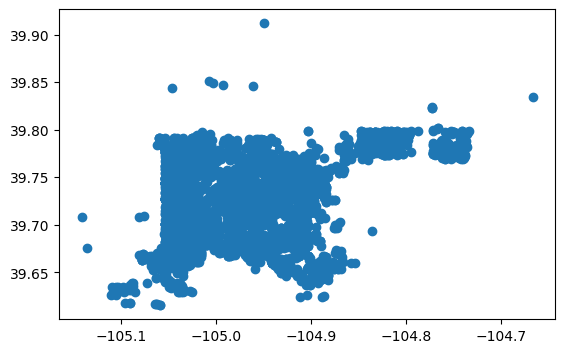

In [15]:
gdf.plot()

In [127]:
h3_geodata = geodata.h3.geo_to_h3_aggregate(8)

In [165]:
colormap = cm.LinearColormap(
    vmin=h3_geodata["is_loose_Dog"].quantile(0.0),
    vmax=h3_geodata["is_loose_Dog"].quantile(1),
    colors=["#d1dbe4", "#a3b7ca", "#7593af", "#476f95", "#194a7a"],
    caption="Number of lost dogs"
)

In [176]:
m = folium.Map(
    location=[39.735168, -104.984448],
    zoom_start=12,
    tiles="cartodbpositron",
    attributionControl=False,
)

tooltip  = folium.GeoJsonTooltip(
    fields=["is_loose_Dog"],
    aliases=["is_loose_Dog"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

geo = folium.GeoJson(
    h3_geodata,
    name="Lost dogs h3-aggregation",
    tooltip=tooltip,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["is_loose_Dog"])
        if x["properties"]["is_loose_Dog"] is not None
        else "transparent",
        "color": "None",
        "fillOpacity": 0.7

    },
).add_to(m)

folium.LayerControl().add_to(m)

colormap.add_to(m)

m

In [177]:
m.save("index.html")